In [250]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.io import loadmat
import pandas as pd
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

In [251]:
#load data chunks and converts to numpy arrays
def load_data_chunks():
    raw_face = np.array(loadmat('./data/data.mat')['face'])
    raw_pose = np.array(loadmat('./data/pose.mat')['pose'])
    raw_illum = np.array(loadmat('./data/illumination.mat')['illum'])
    return raw_face, (raw_pose, raw_illum)
raw_face, raw_pose = load_data_chunks()

In [252]:
def make_augmented_smile(raw_face):
    smile = raw_face[:,:,1::3]
    smile = np.array(np.dsplit(smile,smile.shape[-1])).reshape((200,24,21))
    data = []
#     labels = []

    data_to_augment = smile.reshape((200,24,21,1))
    brightness_gen = ImageDataGenerator(brightness_range=[0.2,1.0])
    zoom_gen = ImageDataGenerator(zoom_range=[0.5,1.0])
    rotation_gen = ImageDataGenerator(rotation_range=90)
    
    bright_it = brightness_gen.flow(data_to_augment, batch_size=200)
    zoom_it = zoom_gen.flow(data_to_augment, batch_size=200)
    rotation_it = rotation_gen.flow(data_to_augment, batch_size=200)
    
    bright_batch, zoom_batch, rotation_batch = bright_it.next(), zoom_it.next(), rotation_it.next()
            
    for i in range(200):
        data.append(bright_batch[i])
        data.append(zoom_batch[i])
        data.append(rotation_batch[i])
        
#         labels.append(0)
#         labels.append(0)
#         labels.append(0)
        
#     labels = np.ravel(np.array(labels))
    data = np.array(data).reshape((600,24*21))
    return data

In [253]:
def make_augmented_neutral(raw_face):
    neutral= raw_face[:,:,::3]
    neutral = np.array(np.dsplit(neutral,neutral.shape[-1])).reshape((200,24,21))
    
    data = []
    labels = []
    
    
    data_to_augment = neutral.reshape((200,24,21,1))
    brightness_gen = ImageDataGenerator(brightness_range=[0.2,1.0])
    zoom_gen = ImageDataGenerator(zoom_range=[0.5,1.0])
    rotation_gen = ImageDataGenerator(rotation_range=90)
    
    bright_it = brightness_gen.flow(data_to_augment, batch_size=200)
    zoom_it = zoom_gen.flow(data_to_augment, batch_size=200)
    rotation_it = rotation_gen.flow(data_to_augment, batch_size=200)
    
    bright_batch, zoom_batch, rotation_batch = bright_it.next(), zoom_it.next(), rotation_it.next()
            
    for i in range(200):
        data.append(bright_batch[i])
        data.append(zoom_batch[i])
        data.append(rotation_batch[i])
        
#         labels.append(0)
#         labels.append(0)
#         labels.append(0)
    
    
        
#     labels = np.ravel(np.array(labels))
    data = np.array(data).reshape((600,24*21))
    return data

In [254]:
aug_smile = make_augmented_smile(raw_face)
aug_neutral = make_augmented_neutral(raw_face)

In [255]:
np.save('data/aug_smile.npy',aug_smile, allow_pickle=True)
np.save('data/aug_neutral.npy',aug_neutral, allow_pickle=True)

In [256]:
smile = np.load('data/aug_smile.npy', allow_pickle=True)

In [257]:
smile.shape

(600, 504)

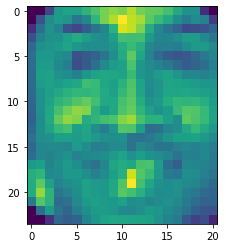

In [262]:
plt.imshow(smile[400].reshape((24,21)))